In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
import random

Using matplotlib backend: Qt5Agg


In [3]:
import gillespy2
from gillespy2.basic_root_solver import BasicRootSolver
from gillespy2.basic_ssa_solver import BasicSSASolver
from gillespy2.basic_tau_hybrid_solver import BasicTauHybridSolver

In [4]:
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.000017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.005)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.001)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=100)
            B = gillespy2.Species(name='B', initial_value=100)
            C = gillespy2.Species(name='C', initial_value=100)
            D = gillespy2.Species(name='D', initial_value=100)
            #DET = gillespy2.Species(name='DET', initial_value=1) #Create a deterministic species
            #Deterministic species will be a regular species, but with "deterministic" flag
            DET = gillespy2.Species(name='DET', initial_value=0, deterministic=True)
            self.add_species([A, B, C, D, DET])
            
            #rate_rules
            rate_rule1 = gillespy2.RateRule(name='rate_rule1', expression="sin(t)", species=DET)
            self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            r4 = gillespy2.Reaction(name="r4", reactants={C:1}, products={D:1}, propensity_function="rate2*A*DET/vol")
            #r4 uses a deterministic species result as an argument
            self.add_reaction([r1,r2,r3, r4])
            self.timespan(numpy.linspace(0,100,1001))

In [5]:
model = MichaelisMenten()
print(model.listOfRateRules)

OrderedDict([('DET', <gillespy2.gillespy2.RateRule object at 0x000001EA92710860>)])


In [8]:
%time results = model.run(solver=BasicTauHybridSolver(), show_labels=True)
#print(results)

Wall time: 1.2 s


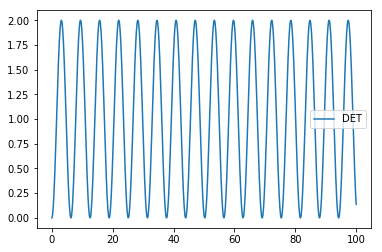

In [9]:
plt.plot(results['time'], results['DET'], label='DET')
plt.legend(loc='best')

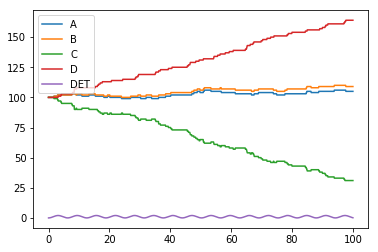

In [10]:
plt.plot(results['time'], results['A'], label='A')
plt.plot(results['time'], results['B'], label='B')
plt.plot(results['time'], results['C'], label='C')
plt.plot(results['time'], results['D'], label='D')
plt.plot(results['time'], results['DET'], label='DET')
plt.legend(loc='best')

In [11]:
%time results_SSA = model.run(solver=BasicSSASolver(), show_labels=True)

Wall time: 10.5 ms


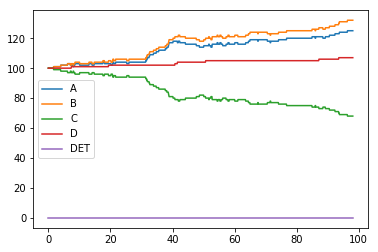

In [12]:
plt.plot(results_SSA['time'], results_SSA['A'], label='A')
plt.plot(results_SSA['time'], results_SSA['B'], label='B')
plt.plot(results_SSA['time'], results_SSA['C'], label='C')
plt.plot(results_SSA['time'], results_SSA['D'], label='D')
plt.plot(results_SSA['time'], results_SSA['DET'], label='DET')
plt.legend(loc='best')

In [13]:
#results = model.run(solver=BasicRootSolver(), show_labels=True)

In [14]:
# plt.plot(results['time'], results['A'], label='A')
# plt.plot(results['time'], results['B'], label='B')
# plt.plot(results['time'], results['C'], label='C')
# plt.plot(results['time'], results['D'], label='D')
# plt.plot(results['time'], results['DET'], label='DET')
# plt.legend(loc='best')

In [15]:
# print(results)

In [16]:
numpy.linspace(0,100,1001)

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

In [17]:
results['DET']

[0,
 0.00499583481175721,
 0.019933423266665168,
 0.04466351674746809,
 0.0789390204195548,
 0.12241746208382967,
 0.17466443853370575,
 0.23515793325171586,
 0.30329384721965796,
 0.3783907311765639,
 0.45969859267220176,
 0.5464050454211795,
 0.6376437581072557,
 0.7325031107775402,
 0.8300353030331505,
 0.9292658188026285,
 1.0292029430695453,
 1.1288461141000266,
 1.2272014757882437,
 1.3232871027885695,
 1.4161424028435066,
 1.5048395789968572,
 1.5884923841115048,
 1.6662649734242694,
 1.7373802566991094,
 1.80112766003322,
 1.8568702272003457,
 1.9040509843700308,
 1.94219850695184,
 1.9709316363781049,
 1.9899602270563481,
 1.999100834569163,
 1.9982578368259696,
 1.9874414616364222,
 1.9667587037446805,
 1.9364159395710945,
 1.896716395280914,
 1.848056743730864,
 1.7909231743582803,
 1.7258865425375818,
 1.653596667821693,
 1.574775256940353,
 1.4902110266267001,
 1.4007472525801064,
 1.3072799569147688,
 1.2107419585119712,
 1.1120978330308422,
 1.0123332205338285,
 0.912446

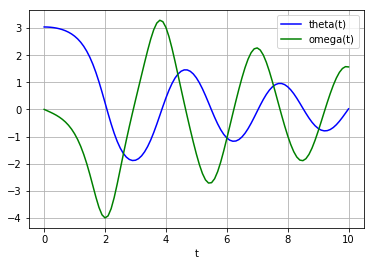

d [1]


In [18]:
def pend(y, t, b, c, d):
    theta, omega = y
    dydt = [omega, -b*omega - c*numpy.sin(theta)]
    d[0] = 1
    return dydt
d = [0]
b = 0.25
c = 5.0
y0 = [numpy.pi - 0.1, 0.0]
t = numpy.linspace(0, 10, 101)

from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(b, c, d))

import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()
print('d',d)

In [19]:
sol.shape

(101, 2)